Accuracy: 1.00


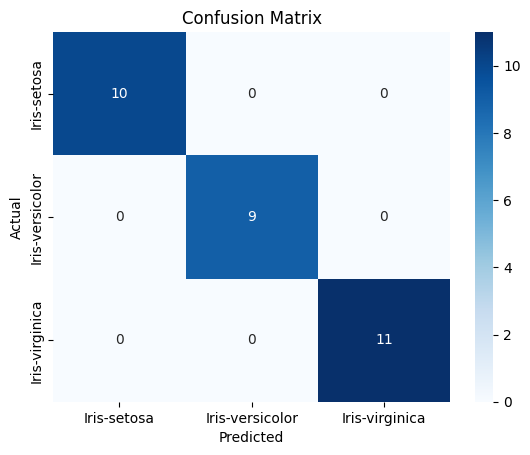

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



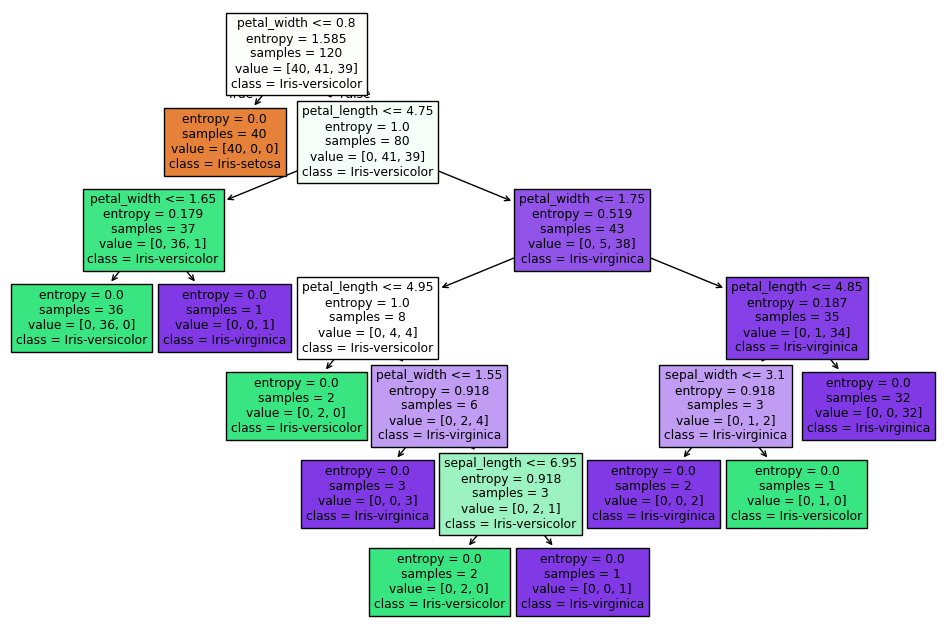

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset from CSV
iris_data = pd.read_csv('/content/iris (1).csv')

# Splitting data into features and target variable
X = iris_data.iloc[:, :-1]
y = iris_data['species']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

# Predicting the test results
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(iris_data['species'].unique()), yticklabels=list(iris_data['species'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred, target_names=list(iris_data['species'].unique())))

# Visualizing the decision tree
plt.figure(figsize=(12,8))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=list(iris_data['species'].unique()))
plt.show()


Accuracy: 1.00


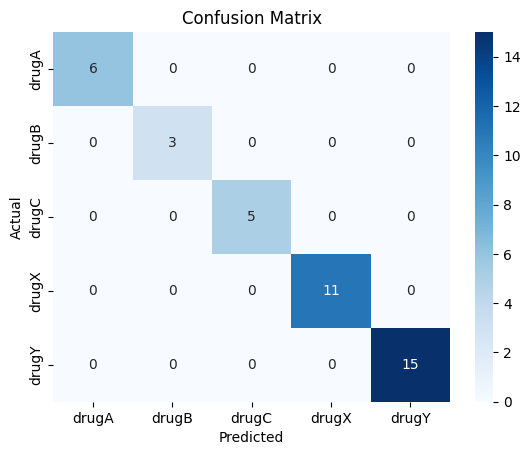

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



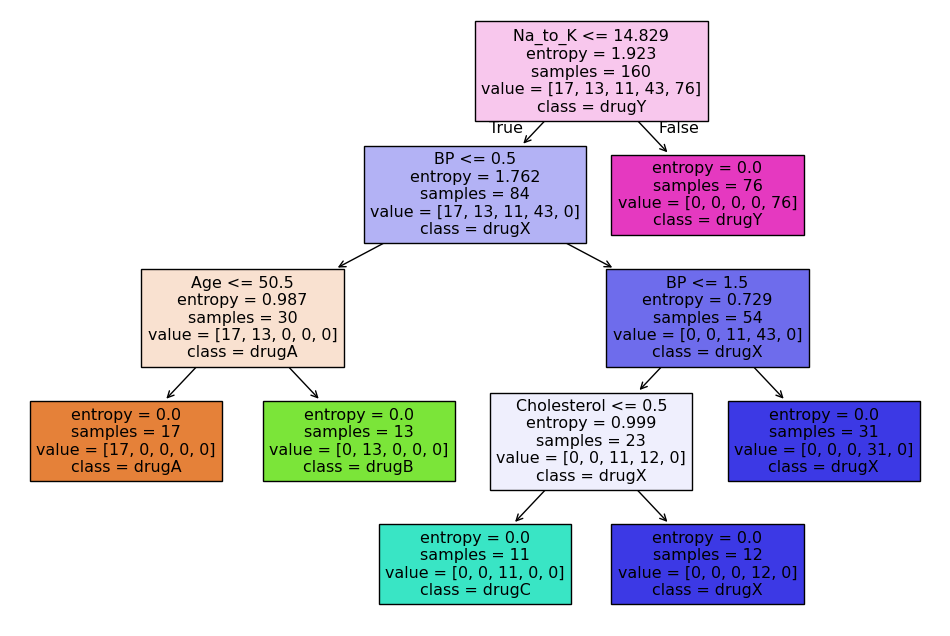

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Drug dataset from CSV
drug_data = pd.read_csv('/content/drug.csv')

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in drug_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    drug_data[column] = le.fit_transform(drug_data[column])
    label_encoders[column] = le

X = drug_data.iloc[:, :-1]
y = drug_data['Drug']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

# Predicting the test results
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[y.name].classes_, yticklabels=label_encoders[y.name].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred, target_names=label_encoders[y.name].classes_))

# Visualizing the decision tree
plt.figure(figsize=(12,8))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=label_encoders[y.name].classes_)
plt.show()


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the Petrol Consumption dataset from CSV
data = pd.read_csv('/content/petrol_consumption.csv')

# Splitting data into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Regression Tree model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predicting the test results
y_pred = regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')




Mean Absolute Error (MAE): 94.30
Mean Squared Error (MSE): 17347.70
Root Mean Squared Error (RMSE): 131.71
